In [1]:
import pandas as pd

RAW_DATA_PATH = r"C:\Users\Vanitha\OneDrive\Desktop\news.csv"

# Load raw dataset
df_raw = pd.read_csv(RAW_DATA_PATH)

print("Raw dataset shape:", df_raw.shape)
df_raw.head() 

Raw dataset shape: (216900, 2)


,Title,Description
0,Obama Lays Wreath at Arlington National Cemetery,Obama Lays Wreath at Arlington National Cemete...
1,A Look at the Health of the Chinese Economy,"Tim Haywood, investment director business-unit..."
2,Nouriel Roubini: Global Economy Not Back to 2008,"Nouriel Roubini, NYU professor and chairman at..."
3,Finland GDP Expands In Q4,Finland's economy expanded marginally in the t...
4,"Tourism, govt spending buoys Thai economy in J...",Tourism and public spending continued to boost...


In [2]:
df_raw.columns.tolist() 

['Title', 'Description']

In [3]:
# Normalize column names
df_raw.columns = (
    df_raw.columns
    .str.strip()        # remove leading/trailing spaces
    .str.lower()        # lowercase
) 
print(df_raw.columns.tolist()) 

['title', 'description']


In [4]:
df_raw[["title", "description"]].isnull().sum()
df_raw.duplicated().sum() 

0

In [5]:
# Schema Validation
df_raw.columns 

Index(['title', 'description'], dtype='object')

In [6]:
required_columns = {"title", "description"}

missing_cols = required_columns - set(df_raw.columns)
if missing_cols:
    raise ValueError(f"Missing columns: {missing_cols}")
else:
    print("✅ Required columns present") 

✅ Required columns present


In [7]:
# Null value Inspection
df_raw.isnull().sum() 

title           0
description    15
dtype: int64

In [8]:
(df_raw.isnull().sum() / len(df_raw)) * 100 

title          0.000000
description    0.006916
dtype: float64

In [9]:
# Empty/ Very short Text check
df_raw["title_length"] = df_raw["title"].astype(str).apply(len)
df_raw["description_length"] = df_raw["description"].astype(str).apply(len)

df_raw[["title_length", "description_length"]].describe() 

,title_length,description_length
count,216900.000000,216900.000000
mean,48.296971,180.520521
std,15.216093,67.845457
min,4.000000,1.000000
25%,37.000000,138.000000
50%,47.000000,158.000000
75%,60.000000,208.000000
max,170.000000,985.000000


In [10]:
# Quick Duplicate Scan
duplicate_rows = df_raw.duplicated().sum()
print("Exact duplicate rows:", duplicate_rows) 

Exact duplicate rows: 0


In [11]:
duplicate_titles = df_raw.duplicated(subset=["title"]).sum()
print("Duplicate titles:", duplicate_titles) 

Duplicate titles: 14385


In [12]:
# Rough text length distribution
df_raw["total_length"] = (
    df_raw["title"].astype(str).apply(len) +
    df_raw["description"].astype(str).apply(len)
)

df_raw["total_length"].describe() 

count    216900.000000
mean        228.817492
std          68.687873
min          16.000000
25%         191.000000
50%         209.000000
75%         253.000000
max        1011.000000
Name: total_length, dtype: float64

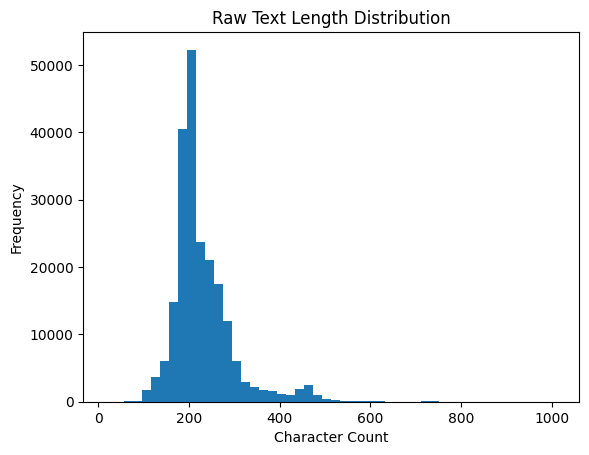

In [13]:
import matplotlib.pyplot as plt

plt.hist(df_raw["total_length"], bins=50)
plt.title("Raw Text Length Distribution")
plt.xlabel("Character Count")
plt.ylabel("Frequency")
plt.show() 

In [15]:
# Save raw dataset
df_raw.to_csv(
    r"C:\Vanitha\Documents\GUVI\final_project\news_popularity_system\data\raw\news.csv",
    index=False
) 